# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [41]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy import signal as sgn


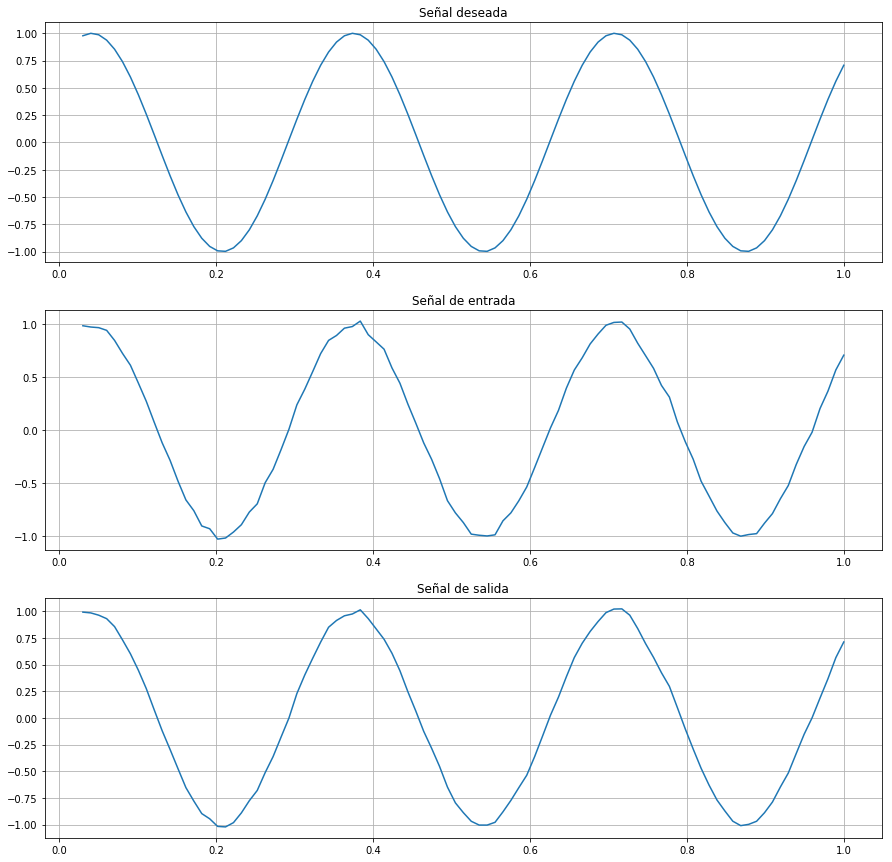

In [30]:
#Realización para los valores originales del problema

w0 = 3
phi0 =  np.pi/4
N = 100
M = 4
amp_ruido = 0.02

# Grilla de sampleo temporal
t = np.linspace(0, 1, N).flatten()

# Señal deseada
d = np.sin( 2*np.pi*w0*t + phi0 )  

# Señal de entrada
u = d + np.random.normal(0,amp_ruido,N)

# Reduzco el tamaño de d para que me den las dimensiones
d = d[M-1:]

# Creo matriz hermitiana de M x N-M+1
Ah = np.zeros((M, N-M+1))
for i in range(N-M+1):
    vect = u[i:M+i]
    Ah[:,i] = vect[::-1]

# Calculo las transpuestas para simplificar los cálculos
dh = d.transpose()
A = Ah.transpose()  

# Autocorrelación de los taps de entrada
auto_corr = Ah @ A

# Correlación cruzada entre los taps de entrada y la función deseada
corr_cruz = Ah @ d

# Vector de taps w_hat
w_hat = inv(auto_corr) @ corr_cruz

# Valor mínimo de ef
ef = dh @ d -dh @ A @ w_hat

# Salida estimada
d_hat = A @ w_hat

plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,1,1)
plt.grid()
plt.title('Señal deseada')
plt.plot(t[M-1:],d)

plt.subplot(3,1,2)
plt.grid()
plt.title('Señal de entrada')
plt.plot(t[M-1:],u[M-1:])

plt.subplot(3,1,3)
plt.grid()
plt.title('Señal de salida')
plt.plot(t[M-1:],d_hat)


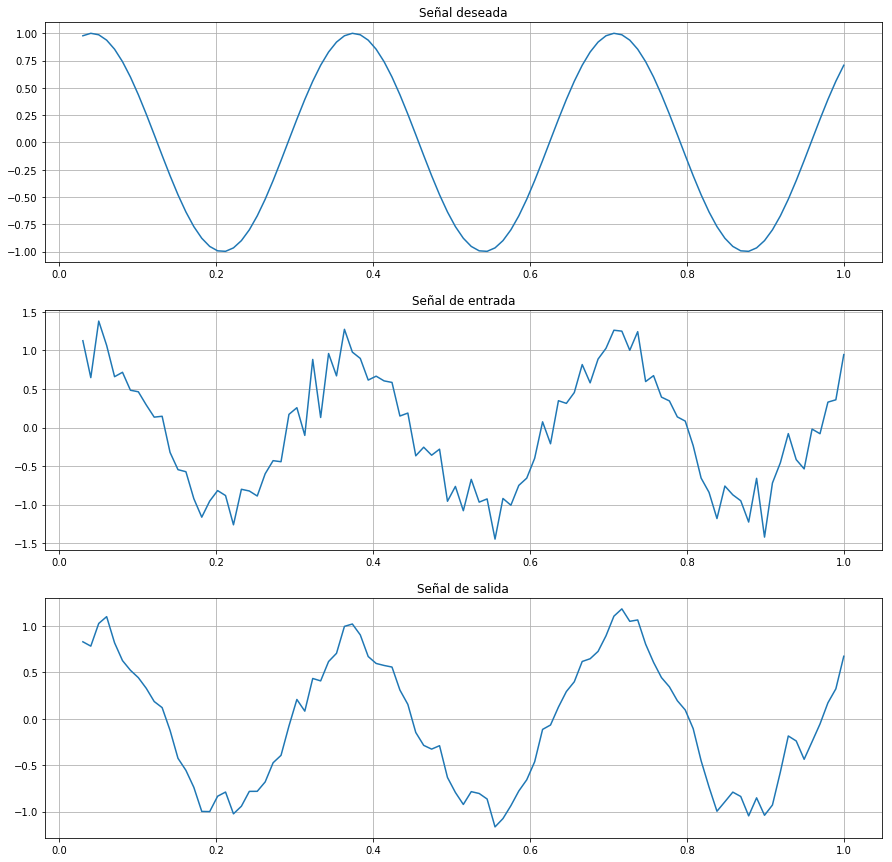

In [31]:
#Realización para amplitud del ruido = 0.2

w0 = 3
phi0 =  np.pi/4
N = 100
M = 4
amp_ruido = 0.2

# Grilla de sampleo temporal
t = np.linspace(0, 1, N).flatten()

# Señal deseada
d = np.sin( 2*np.pi*w0*t + phi0 )  

# Señal de entrada
u = d + np.random.normal(0,amp_ruido,N)

# Reduzco el tamaño de d para que me den las dimensiones
d = d[M-1:]

# Creo matriz hermitiana de M x N-M+1
Ah = np.zeros((M, N-M+1))
for i in range(N-M+1):
    vect = u[i:M+i]
    Ah[:,i] = vect[::-1]

# Calculo las transpuestas para simplificar los cálculos
dh = d.transpose()
A = Ah.transpose()  

# Autocorrelación de los taps de entrada
auto_corr = Ah @ A

# Correlación cruzada entre los taps de entrada y la función deseada
corr_cruz = Ah @ d

# Vector de taps w_hat
w_hat = inv(auto_corr) @ corr_cruz

# Valor mínimo de ef
ef = dh @ d -dh @ A @ w_hat

# Salida estimada
d_hat = A @ w_hat

plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,1,1)
plt.grid()
plt.title('Señal deseada')
plt.plot(t[M-1:],d)

plt.subplot(3,1,2)
plt.grid()
plt.title('Señal de entrada')
plt.plot(t[M-1:],u[M-1:])

plt.subplot(3,1,3)
plt.grid()
plt.title('Señal de salida')
plt.plot(t[M-1:],d_hat)


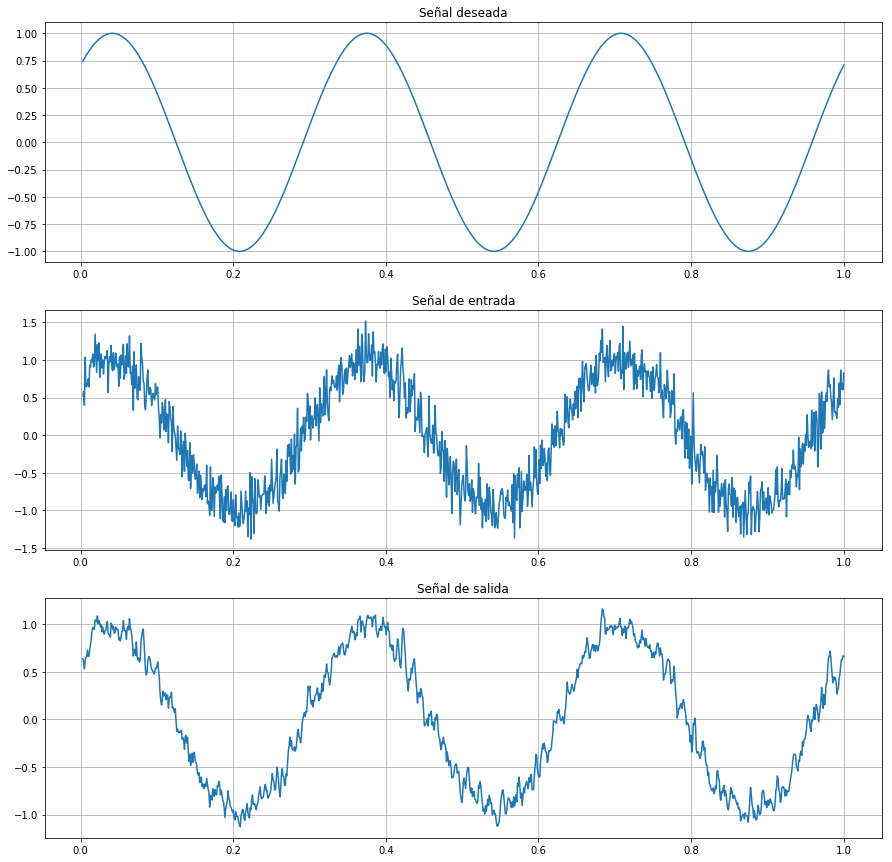

In [32]:
#Realización para N = 1000 y amplitud del ruido 0.2

w0 = 3
phi0 =  np.pi/4
N = 1000
M = 4
amp_ruido = 0.2

# Grilla de sampleo temporal
t = np.linspace(0, 1, N).flatten()

# Señal deseada
d = np.sin( 2*np.pi*w0*t + phi0 )  

# Señal de entrada
u = d + np.random.normal(0,amp_ruido,N)

# Reduzco el tamaño de d para que me den las dimensiones
d = d[M-1:]

# Creo matriz hermitiana de M x N-M+1
Ah = np.zeros((M, N-M+1))
for i in range(N-M+1):
    vect = u[i:M+i]
    Ah[:,i] = vect[::-1]

# Calculo las transpuestas para simplificar los cálculos
dh = d.transpose()
A = Ah.transpose()  

# Autocorrelación de los taps de entrada
auto_corr = Ah @ A

# Correlación cruzada entre los taps de entrada y la función deseada
corr_cruz = Ah @ d

# Vector de taps w_hat
w_hat = inv(auto_corr) @ corr_cruz

# Valor mínimo de ef
ef = dh @ d -dh @ A @ w_hat

# Salida estimada
d_hat = A @ w_hat

plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,1,1)
plt.grid()
plt.title('Señal deseada')
plt.plot(t[M-1:],d)

plt.subplot(3,1,2)
plt.grid()
plt.title('Señal de entrada')
plt.plot(t[M-1:],u[M-1:])

plt.subplot(3,1,3)
plt.grid()
plt.title('Señal de salida')
plt.plot(t[M-1:],d_hat)


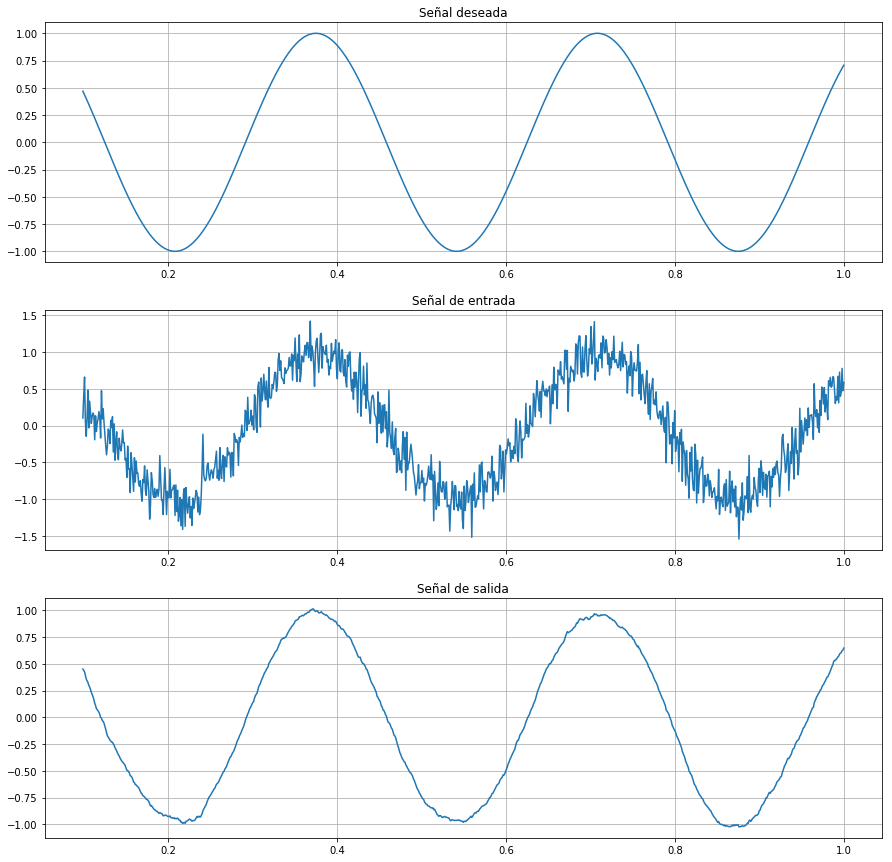

In [38]:
#Realización para N = 1000, M = 200 y amplitud del ruido de 0.2

w0 = 3
phi0 =  np.pi/4
N = 1000
M = 200
amp_ruido = 0.2

# Grilla de sampleo temporal
t = np.linspace(0, 1, N).flatten()

# Señal deseada
d = np.sin( 2*np.pi*w0*t + phi0 )  

# Señal de entrada
u = d + np.random.normal(0,amp_ruido,N)

# Reduzco el tamaño de d para que me den las dimensiones
d = d[M-1:]

# Creo matriz hermitiana de M x N-M+1
Ah = np.zeros((M, N-M+1))
for i in range(N-M+1):
    vect = u[i:M+i]
    Ah[:,i] = vect[::-1]

# Calculo las transpuestas para simplificar los cálculos
dh = d.transpose()
A = Ah.transpose()  

# Autocorrelación de los taps de entrada
auto_corr = Ah @ A

# Correlación cruzada entre los taps de entrada y la función deseada
corr_cruz = Ah @ d

# Vector de taps w_hat
w_hat = inv(auto_corr) @ corr_cruz

# Valor mínimo de ef
ef = dh @ d -dh @ A @ w_hat

# Salida estimada
d_hat = A @ w_hat

plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,1,1)
plt.grid()
plt.title('Señal deseada')
plt.plot(t[M-1:],d)

plt.subplot(3,1,2)
plt.grid()
plt.title('Señal de entrada')
plt.plot(t[M-1:],u[M-1:])

plt.subplot(3,1,3)
plt.grid()
plt.title('Señal de salida')
plt.plot(t[M-1:],d_hat)


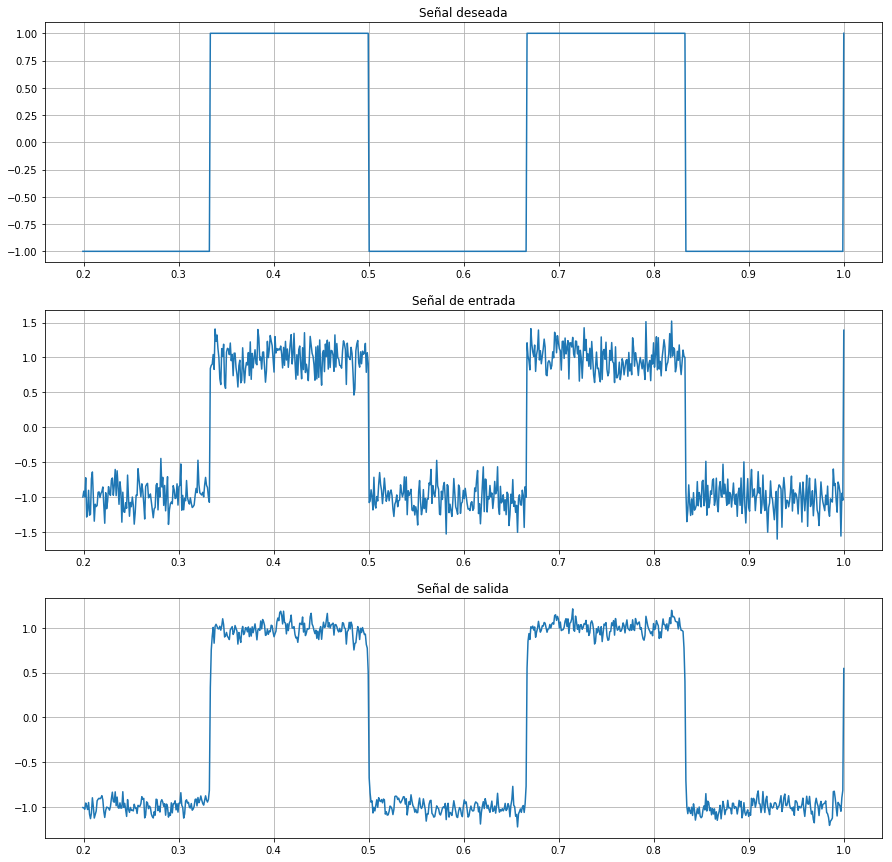

In [44]:
#Realización para N = 1000, M = 200, amplitud del ruido = 0.2 y señal cuadrada

w0 = 3
phi0 =  np.pi/4
N = 1000
M = 200
amp_ruido = 0.2

# Grilla de sampleo temporal
t = np.linspace(0, 1, N).flatten()

# Señal deseada
d = sgn.square(2 * np.pi * w0 *t)

# Señal de entrada
u = d + np.random.normal(0,amp_ruido,N)

# Reduzco el tamaño de d para que me den las dimensiones
d = d[M-1:]

# Creo matriz hermitiana de M x N-M+1
Ah = np.zeros((M, N-M+1))
for i in range(N-M+1):
    vect = u[i:M+i]
    Ah[:,i] = vect[::-1]

# Calculo las transpuestas para simplificar los cálculos
dh = d.transpose()
A = Ah.transpose()  

# Autocorrelación de los taps de entrada
auto_corr = Ah @ A

# Correlación cruzada entre los taps de entrada y la función deseada
corr_cruz = Ah @ d

# Vector de taps w_hat
w_hat = inv(auto_corr) @ corr_cruz

# Valor mínimo de ef
ef = dh @ d -dh @ A @ w_hat

# Salida estimada
d_hat = A @ w_hat

plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,1,1)
plt.grid()
plt.title('Señal deseada')
plt.plot(t[M-1:],d)

plt.subplot(3,1,2)
plt.grid()
plt.title('Señal de entrada')
plt.plot(t[M-1:],u[M-1:])

plt.subplot(3,1,3)
plt.grid()
plt.title('Señal de salida')
plt.plot(t[M-1:],d_hat)


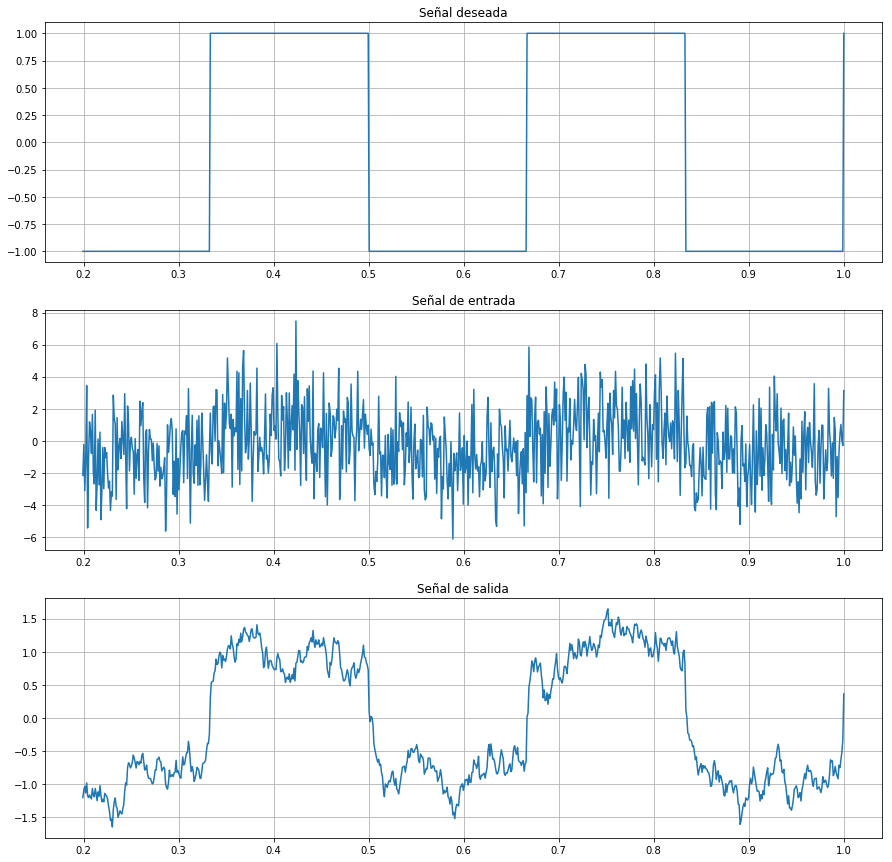

In [49]:
#Realización para N = 1000, M = 200, amplitud del ruido = 2 y señal cuadrada

w0 = 3
phi0 =  np.pi/4
N = 1000
M = 200
amp_ruido = 2

# Grilla de sampleo temporal
t = np.linspace(0, 1, N).flatten()

# Señal deseada
d = sgn.square(2 * np.pi * w0 *t)

# Señal de entrada
u = d + np.random.normal(0,amp_ruido,N)

# Reduzco el tamaño de d para que me den las dimensiones
d = d[M-1:]

# Creo matriz hermitiana de M x N-M+1
Ah = np.zeros((M, N-M+1))
for i in range(N-M+1):
    vect = u[i:M+i]
    Ah[:,i] = vect[::-1]

# Calculo las transpuestas para simplificar los cálculos
dh = d.transpose()
A = Ah.transpose()  

# Autocorrelación de los taps de entrada
auto_corr = Ah @ A

# Correlación cruzada entre los taps de entrada y la función deseada
corr_cruz = Ah @ d

# Vector de taps w_hat
w_hat = inv(auto_corr) @ corr_cruz

# Valor mínimo de ef
ef = dh @ d -dh @ A @ w_hat

# Salida estimada
d_hat = A @ w_hat

plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,1,1)
plt.grid()
plt.title('Señal deseada')
plt.plot(t[M-1:],d)

plt.subplot(3,1,2)
plt.grid()
plt.title('Señal de entrada')
plt.plot(t[M-1:],u[M-1:])

plt.subplot(3,1,3)
plt.grid()
plt.title('Señal de salida')
plt.plot(t[M-1:],d_hat)


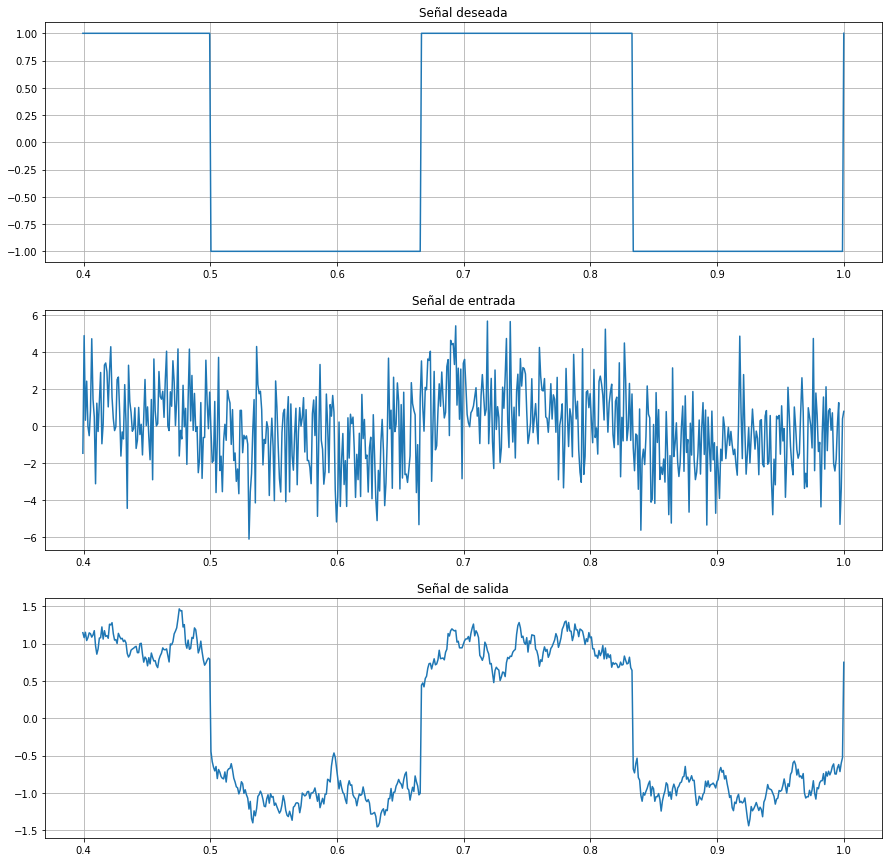

In [50]:
#Realización para N = 1000, M = 400, amplitud del ruido = 2 y señal cuadrada

w0 = 3
phi0 =  np.pi/4
N = 1000
M = 400
amp_ruido = 2

# Grilla de sampleo temporal
t = np.linspace(0, 1, N).flatten()

# Señal deseada
d = sgn.square(2 * np.pi * w0 *t)

# Señal de entrada
u = d + np.random.normal(0,amp_ruido,N)

# Reduzco el tamaño de d para que me den las dimensiones
d = d[M-1:]

# Creo matriz hermitiana de M x N-M+1
Ah = np.zeros((M, N-M+1))
for i in range(N-M+1):
    vect = u[i:M+i]
    Ah[:,i] = vect[::-1]

# Calculo las transpuestas para simplificar los cálculos
dh = d.transpose()
A = Ah.transpose()  

# Autocorrelación de los taps de entrada
auto_corr = Ah @ A

# Correlación cruzada entre los taps de entrada y la función deseada
corr_cruz = Ah @ d

# Vector de taps w_hat
w_hat = inv(auto_corr) @ corr_cruz

# Valor mínimo de ef
ef = dh @ d -dh @ A @ w_hat

# Salida estimada
d_hat = A @ w_hat

plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(3,1,1)
plt.grid()
plt.title('Señal deseada')
plt.plot(t[M-1:],d)

plt.subplot(3,1,2)
plt.grid()
plt.title('Señal de entrada')
plt.plot(t[M-1:],u[M-1:])

plt.subplot(3,1,3)
plt.grid()
plt.title('Señal de salida')
plt.plot(t[M-1:],d_hat)
